<a href="https://colab.research.google.com/github/dperkins3pi/ACT_Scores/blob/main/HW3_1_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kagglehub
import numpy as np
import torchvision
import kagglehub
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity

**3.1:** For each of the four main data types listed in Section 3.1.2 Find a data set with data of the given type that has at least 200 data points in it, and open it in your preferred data system. Do not use a spreadsheet, like Microsoft Excel or Google sheets! Store the data in a table with each row corresponding to a single instance and each column corresponding to a feature or measurement made on each instance, as in the iris data on page 148.

**(i):** For your nominal data set, ensure that your data are not stored as numerical values, but rather in a data format appropriate for the meaning of the data (e.g., datetime format for dates, or strings for zip codes). Compute the sample mode of the data. Apply a one-hot encoding to the data, average the columns of the one-hot encoding, and interpret the resulting numbers

In [ ]:
# Download latest version
mushroom_data = pd.read_csv("mushrooms.csv")
print(mushroom_data)

     class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0        p         x           s         n       t    p               f   
1        e         x           s         y       t    a               f   
2        e         b           s         w       t    l               f   
3        p         x           y         w       t    p               f   
4        e         x           s         g       f    n               f   
...    ...       ...         ...       ...     ...  ...             ...   
8119     e         k           s         n       f    n               a   
8120     e         x           s         n       f    n               a   
8121     e         f           s         n       f    n               a   
8122     p         k           y         n       f    y               f   
8123     e         x           s         n       f    n               a   

     gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0               c         n

This is the mushroom dataset from Kaggle. It is a list of a bunch of different attributes for mushrooms. For example, the cap-shape column denotes the shape of the mushroom. The letters in this column, for example, mean bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s.

In [ ]:
print(mushroom_data.mode())

  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     e         x           y         n       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         b          b  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 w          v       d  

[1 rows x 23 columns]


I used the pandas mode() function to compute the sample mode for each of the features. The most common cap shape, for example was convex.

In [ ]:
cap_shape_encoded = pd.get_dummies(mushroom_data['cap-shape'], prefix='cap-shape')
print("one-hot-encoded\n", cap_shape_encoded)  # Show one-hot encoded version
print()
print("means:", np.mean(cap_shape_encoded.to_numpy(), axis=0))

one-hot-encoded
       cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  \
0           False        False        False        False        False   
1           False        False        False        False        False   
2            True        False        False        False        False   
3           False        False        False        False        False   
4           False        False        False        False        False   
...           ...          ...          ...          ...          ...   
8119        False        False        False         True        False   
8120        False        False        False        False        False   
8121        False        False         True        False        False   
8122        False        False        False         True        False   
8123        False        False        False        False        False   

      cap-shape_x  
0            True  
1            True  
2           False  
3            True  
4     

I one-hot encoded the mushroom shape column. This gave a dataFrame of five columns where each row had exactly one true value. Next, I took the mean of the column values in one hot encoding. This tells us the proporition of mushrooms with each shape. For example the first element of the mean vector 0.05563 means that 5.563% of the mushrooms had the bell shape.

**(ii):** For your ordinal data compute the sample mode, sample median, first and third sample quartiles, and the interquartile range. Interpret the results.

In [ ]:
# Download latest version
movie_review_dataset = pd.read_csv("train.csv").drop(columns="text")
print(movie_review_dataset)

     experience
0             2
1             0
2             2
3             0
4             1
..          ...
713           1
714           1
715           2
716           2
717           2

[718 rows x 1 columns]


This is the Hindi Movie Reviews Dataset from Kaggle. It is a list of a bunch of different movies and their ratings (in the experience column). 0 denotes a negative review, 1 neutral, and 2 positive. This is clearly ordinal because it doesn't make since to add (2 neutral reviews do not make a positive one). Since the movie titles were in some foreign language, I removed it.

In [ ]:
print("Mode:", movie_review_dataset["experience"].mode()[0])
print("Median", movie_review_dataset["experience"].median())
print("1st Quartile", movie_review_dataset["experience"].quantile(0.25))
print("3rd Quartile", movie_review_dataset["experience"].quantile(0.75))
print("IQR", movie_review_dataset["experience"].quantile(0.75) - movie_review_dataset["experience"].quantile(0.25))

Mode: 2
Median 1.0
1st Quartile 0.0
3rd Quartile 2.0
IQR 2.0


The mode of two means that the majority of movies were enjoyed. The median of one means that on average, people had neutral opinions about the move. The 1st quartile means that at least 25% of the movies had a poor rating. The 3st quartile means that at least 25% of the movies had a high rating. The Interqualtile says that the data is relatively spread out, since at least 25% of the movies were fit into each of the rating categories.

**(iii):** For your interval data compute the sample mode, sample median, first and third sample quartiles, the interquartile range, and the sample mean. Interpret the results. Plot a histogram and a KDE.

In [ ]:
# Download data
weather_dataset = pd.read_csv("Weather Data.csv")[["Temp_C"]]
print(weather_dataset)

      Temp_C
0       -1.8
1       -1.8
2       -1.8
3       -1.5
4       -1.5
...      ...
8779     0.1
8780     0.2
8781    -0.5
8782    -0.2
8783     0.0

[8784 rows x 1 columns]


This is another dataset I found from Kaggle that records the tempurature in Celcius of a certain location at every hour for the entire year of 2012. It is interval data because the choise of zero in degrees Celcius is arbitrary (meaning that ratios don't mean anything).

In [ ]:
print("Mode:", weather_dataset["Temp_C"].mode()[0])
print("Median", weather_dataset["Temp_C"].median())
print("1st Quartile", weather_dataset["Temp_C"].quantile(0.25))
print("3rd Quartile", weather_dataset["Temp_C"].quantile(0.75))
print("IQR", weather_dataset["Temp_C"].quantile(0.75) - weather_dataset["Temp_C"].quantile(0.25))
print("Mean", weather_dataset["Temp_C"].mean())

Mode: 16.6
Median 9.3
1st Quartile 0.1
3rd Quartile 18.8
IQR 18.7
Mean 8.798144353369764


The desired quantites are above. The median and mean both mean that on average, it was about 9 degrees. The mode means that the most commonly recorded tempurature happened to be 16.6 degrees. The first quartile means that 25% of the time is was practically below freezing. The 3rd quartile means that 25% of the time, it was hotter than 18.8 degrees. And, the IQR means that the tempuratures had a relatively high spread, with a 19 degree difference between the first and third quartile.

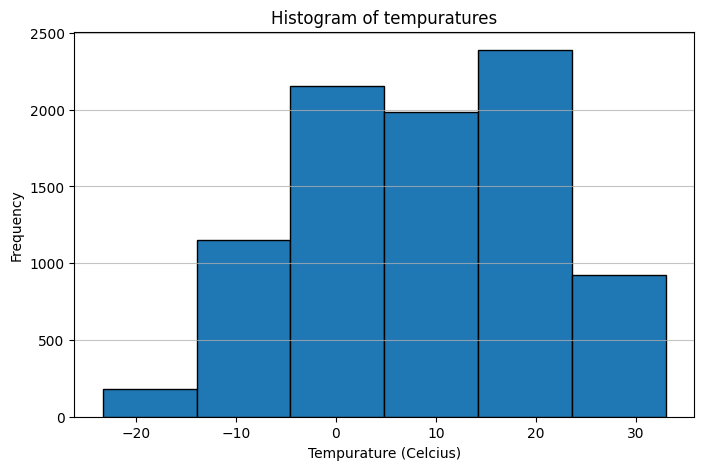

In [ ]:
# Plotting the histogram
plt.figure(figsize=(8, 5))  # Set the figure size
plt.hist(weather_dataset['Temp_C'], bins=6, edgecolor='black')  # Adjust bins as necessary
plt.title('Histogram of tempuratures')
plt.xlabel('Tempurature (Celcius)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)  # Add grid for better readability
plt.show()

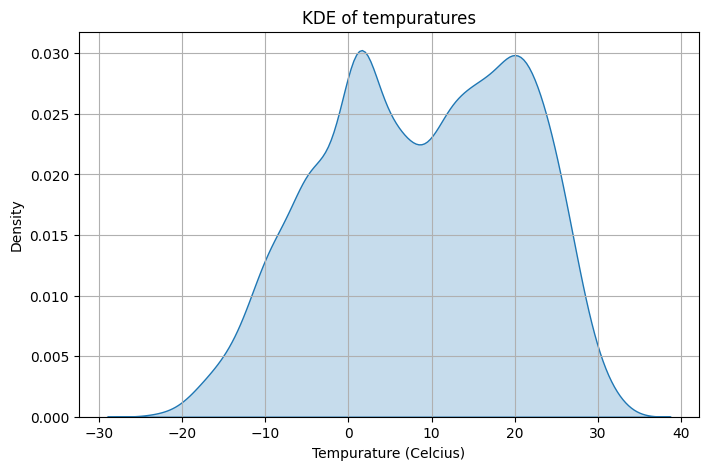

In [ ]:
# Plotting the KDE
plt.figure(figsize=(8, 5))  # Set the figure size
sns.kdeplot(weather_dataset['Temp_C'], fill=True)  # Use fill=True to fill the area under the curve
plt.title('KDE of tempuratures')
plt.xlabel('Tempurature (Celcius)')
plt.ylabel('Density')
plt.grid()
plt.show()

**(iv):** For your ratio data, compute the sample mode, sample median, first and third sample quartiles, the interquartile range, and the sample mean. Interpret the results. Plot a histogram and a KDE.

In [ ]:
# Download data
penguin_dataset = pd.read_csv("penguins_size.csv")[["flipper_length_mm"]].dropna()
print(penguin_dataset)

     flipper_length_mm
0                181.0
1                186.0
2                195.0
4                193.0
5                190.0
..                 ...
338              214.0
340              215.0
341              222.0
342              212.0
343              213.0

[342 rows x 1 columns]


This is another dataset I found from Kaggle that records the flipper length of penguins. This is obviosly ratio data since all the mathematical operations make sense on it.

In [ ]:
print("Mode:", penguin_dataset["flipper_length_mm"].mode()[0])
print("Median", penguin_dataset["flipper_length_mm"].median())
print("1st Quartile", penguin_dataset["flipper_length_mm"].quantile(0.25))
print("3rd Quartile", penguin_dataset["flipper_length_mm"].quantile(0.75))
print("IQR", penguin_dataset["flipper_length_mm"].quantile(0.75) - penguin_dataset["flipper_length_mm"].quantile(0.25))
print("Mean", penguin_dataset["flipper_length_mm"].mean())

Mode: 190.0
Median 197.0
1st Quartile 190.0
3rd Quartile 213.0
IQR 23.0
Mean 200.91520467836258


The mode means that 190mm happened to be the most common flipper length. The median and mean oth mean that on average, a penguin's flipped was around 200mm. The first quartile means that 25% of penguins have flippers 190mm or smaller. The 3rd quartile means that 25% of the penguins had flipper sizes larger than or equal to 213mm. And, the IQR means that the spread of the average flipper size is around 23mm.

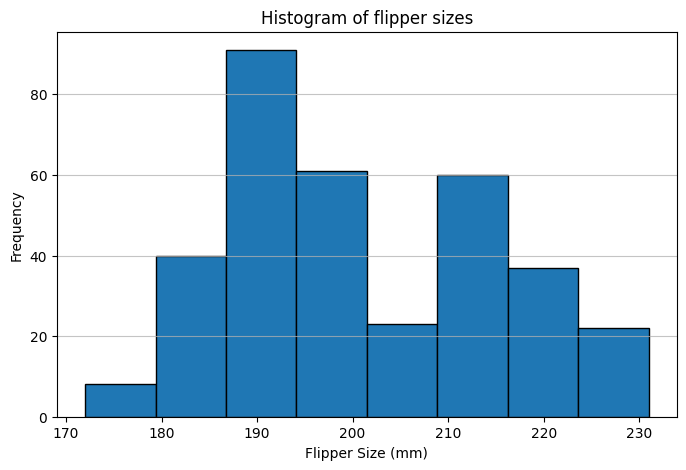

In [ ]:
# Plotting the histogram
plt.figure(figsize=(8, 5))  # Set the figure size
plt.hist(penguin_dataset['flipper_length_mm'], bins=8, edgecolor='black')  # Adjust bins as necessary
plt.title('Histogram of flipper sizes')
plt.xlabel('Flipper Size (mm)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)  # Add grid for better readability
plt.show()

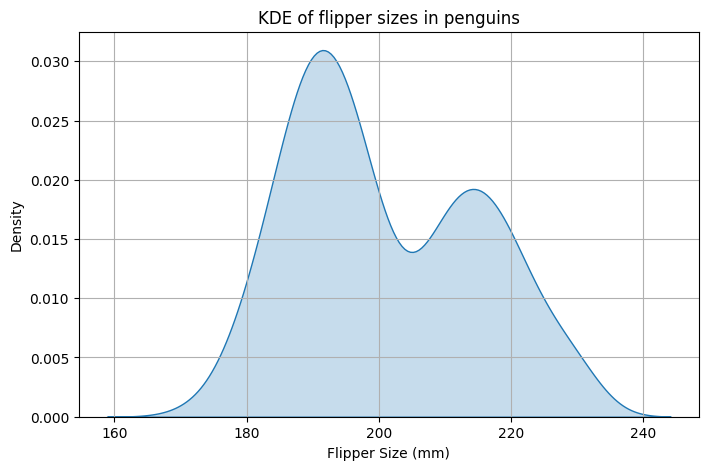

In [ ]:
# Plotting the KDE
plt.figure(figsize=(8, 5))  # Set the figure size
sns.kdeplot(penguin_dataset['flipper_length_mm'], fill=True)  # Use fill=True to fill the area under the curve
plt.title('KDE of flipper sizes in penguins')
plt.xlabel('Flipper Size (mm)')
plt.ylabel('Density')
plt.grid()
plt.show()

**3.2:** Find an example “in real life” (somewhere that someone really did this really thinking it was actually ok, and not just as a bad example given for educational purposes) for the following:

**(i):** Nominal data stored as digits and at least one of an average (mean), median, quartiles, or variance computed.

The closes thing I could find to this is this website: https://www.newscientist.com/lastword/0-what-is-the-age-location-appearance-of-the-worlds-average-person/

It talks about who the most average person would be. But, it seems to confuse the mean with the mode by saying that the average person is Chinese. This doesn't make sense because nationality is nominal and you can't take its mean/average.

I assumed that this was calculated by storing nominal data as digits. Though, it is possible that that wasn't the case and that the author was just referring to the mean. But, I couldn't find anything else. So, this was my best shot.

**(ii):** Ordinal data stored as digits and an average (mean) or variance computed.

I found an example right here:
https://www.thisismoney.co.uk/money/cars/article-11807987/Discover-Uber-rider-rating-one-star-reviews-have.html

In this website, they were talking about how Uber drivers rate there riders. This is ordinal dating because it is out of a five star rating. 2 stars is not twice as good as one star. The article I cited above took the mean of the star rating, claiming that on average, Uber riders are given a 4.89 rating. This doesn't make that much sense because the data was ordinal.

**(iii)\*(Extra Credit):** Interval data where either a ratio of two points is computed (e.g., one is interpreted as twice as big as another) or where zero is interpreted as meaning that this data point has none of whatever is being measured.

I found this website https://www.theguardian.com/cities/2018/aug/13/halfway-boiling-city-50c

It is talking about global warming. But, the author claims that 50 degrees celcius is halfway to boiling point. This is obviously not true since 100 degrees is not twice as hot as 50. Degrees celcius is interval data since the value for zero was chosen arbitrarly.

**3.3:** Consider the p.d.f. $f(x)=\frac{1}{4}\sum_{k=1}^4\phi(x-3k)$ where $\phi(x)$ is the p.d.f. for the standard normal distribution.

**(i):** One can draw from the distribution defined by $f$ by first choosing a value
of $k$ uniformly from $\{1, 2, 3, 4\}$ and then drawing $z$ from the standard
normal distribution and letting $x = z + 3k$. Numerically draw from this
distribution $n = 1000$ times and call the result $x = (x_1,...,x_n)$.

In [ ]:
xs = []
for n in range(1000):
    # Draw from the distribution
    k = np.random.randint(1, 5)
    z = np.random.normal(loc=0, scale=1)
    xs.append(z+3*k)
xs = np.array(xs)

**(ii):** Let $a = \text{min}(x_1,...,x_n)$ and $b = \text{max}(x_1,...,x_n)$ For each value of
$m\in \{1, 6, 11, 16,..., 46\}$ plot the histogram for $x$ on $(a, b]$ with $m$ bins,
and plot the p.d.f. $f(x)$ on each of these histograms for comparison.

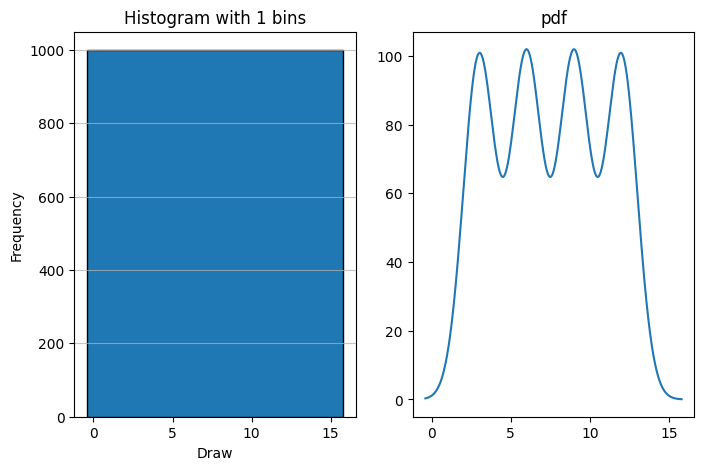

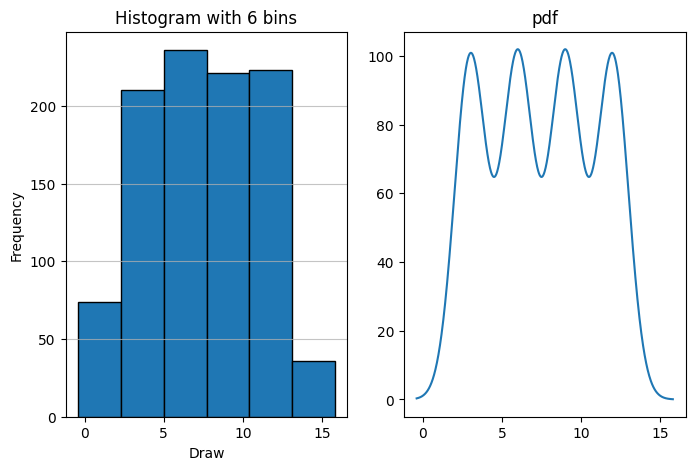

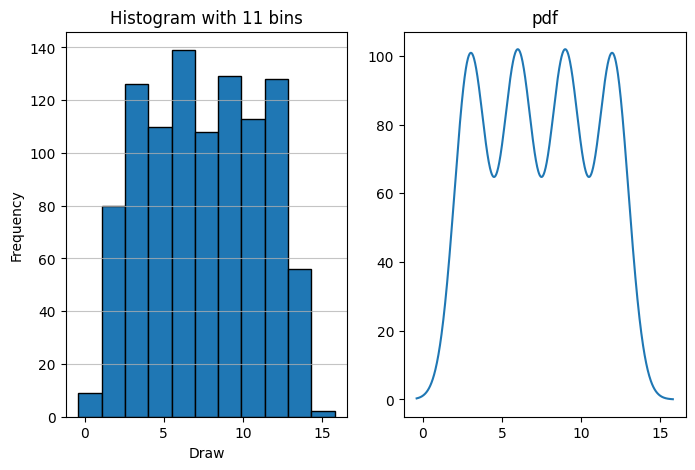

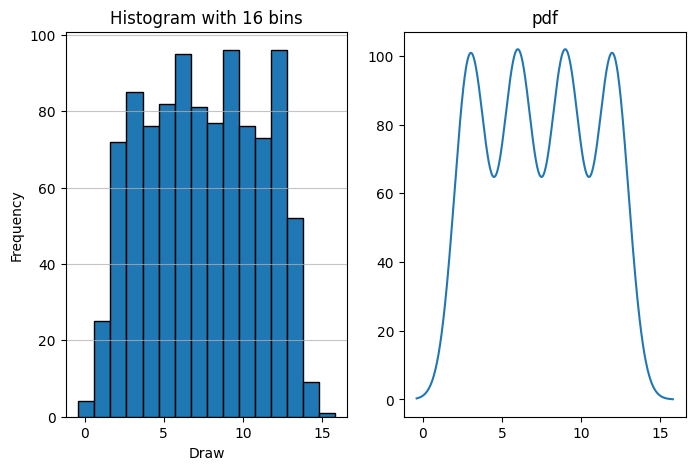

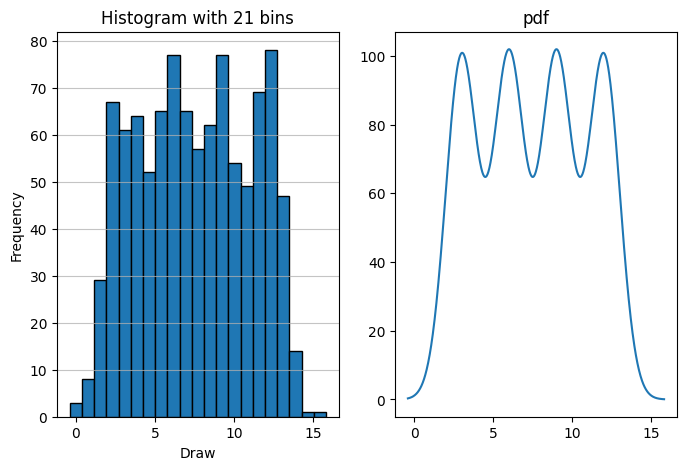

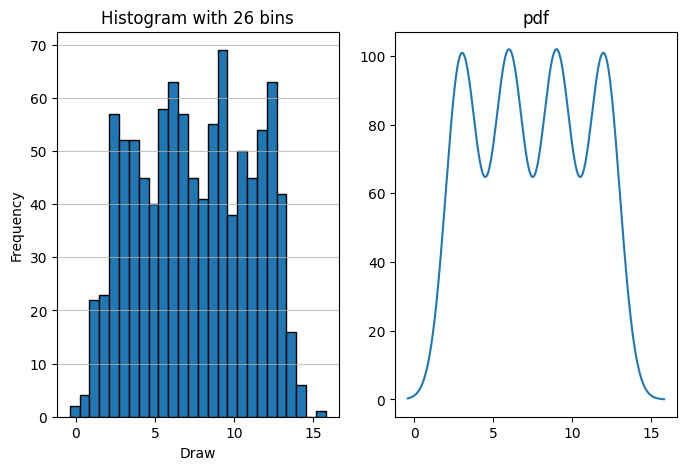

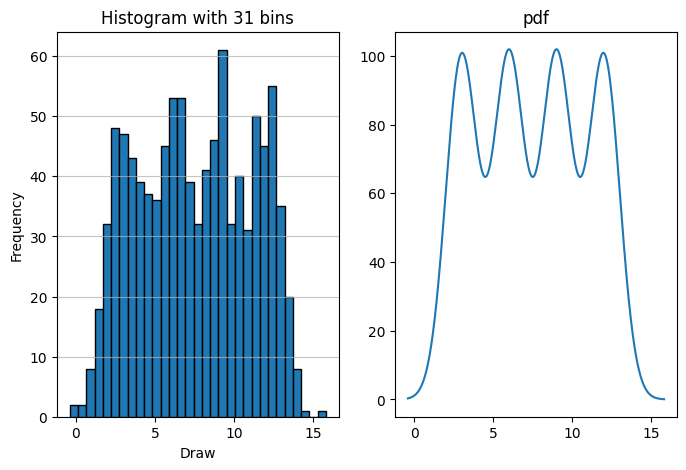

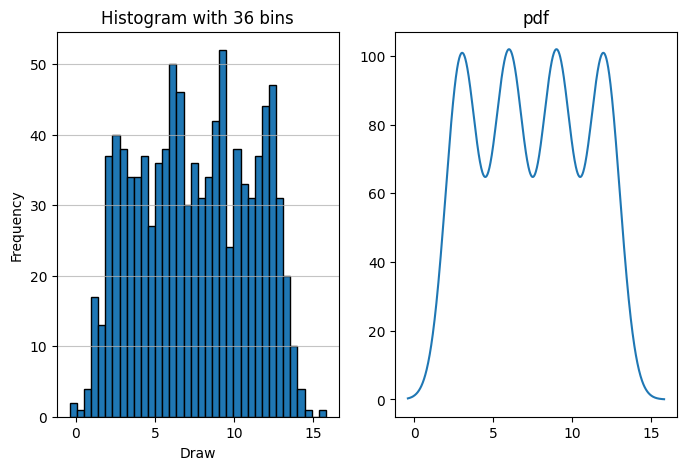

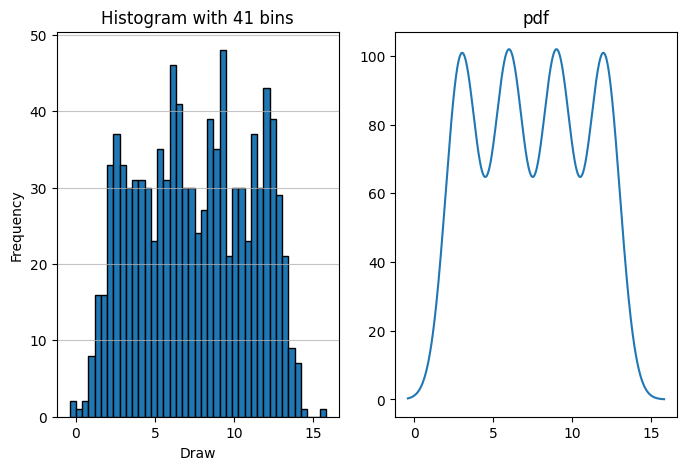

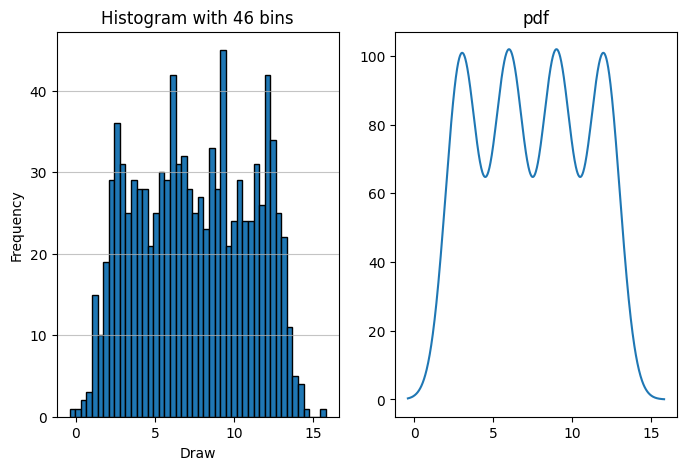

In [ ]:
a, b = np.min(xs), np.max(xs)

def f(x):
    return (1 / 4) * sum([norm.pdf(x - 3 * k) for k in range(1, 5)])
the_xs = np.linspace(a, b, 1000)  # Create x values for smooth curve

# Plotting the histogram and pdf
for m in [1+j for j in range(0, 46, 5)]:
    plt.figure(figsize=(8, 5))  # Set the figure size
    plt.subplot(121)
    plt.hist(xs, bins=m, range=(a, b), edgecolor='black')  # Adjust bins as necessary
    plt.title(f"Histogram with {m} bins")
    plt.xlabel('Draw')
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)  # Add grid for better readability
    plt.subplot(122)
    plt.title("pdf")
    plt.plot(the_xs, f(the_xs) * 1000)
    plt.show()

**(iii):** Compute the Freedman-Diaconis binwidth $h$ (see (3.1)) for $x$ and plot
the histogram on $(a, b]$ with that binwidth

6.06303743224975


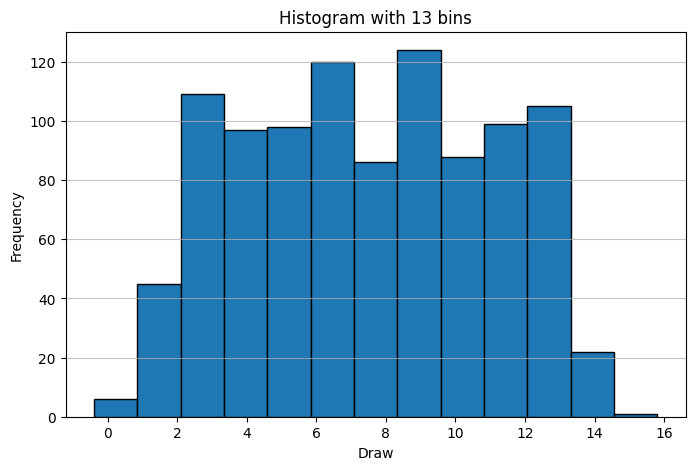

In [ ]:
# Compute the IQR and later the optimal bin count using 3.1
Q1 = np.percentile(xs, 25)
Q3 = np.percentile(xs, 75)
IQR = Q3 - Q1
print(IQR)
bin_width = 2*IQR / (len(xs)**(1/3.))
bins = (b - a) / bin_width
bins = int(np.round(bins))

# Plotting the histogram and pdf
plt.figure(figsize=(8, 5))  # Set the figure size
plt.hist(xs, bins=bins, range=(a, b), edgecolor='black')  # Adjust bins as necessary
plt.title(f"Histogram with {bins} bins")
plt.xlabel('Draw')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)  # Add grid for better readability
plt.show()


**3.4:** For the same sample $x$ used in Exercise 3.3.(i), do the following:

**(i):** For each value of $h\in \{2^{-3},2^{-2},2^{-1},2^{0},2^{1},2^{2}\}$ plot the KDE for the sample $x$ with the Epanechnikov kernel, and plot the p.d.f. $f(x)$ on each of these KDEs for comparison.

Hint: unless your numerical system already has the Epanechnikov KDE build in, you may need to code up an implementation of the KDE $\hat{f_x}$

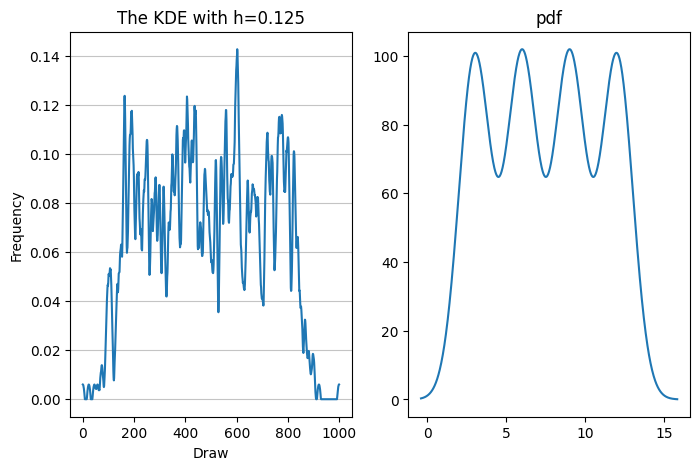

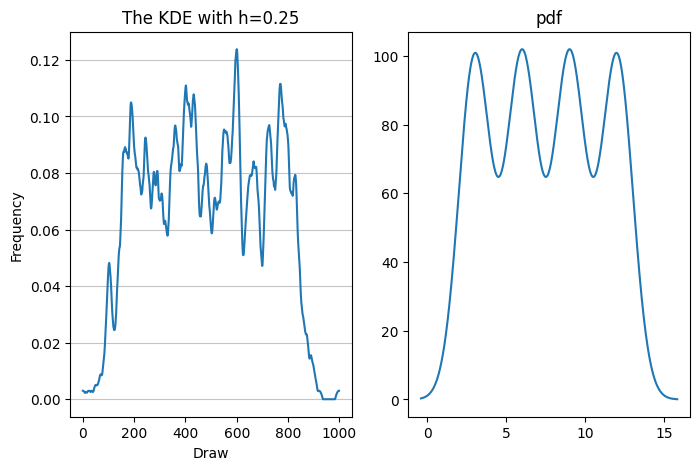

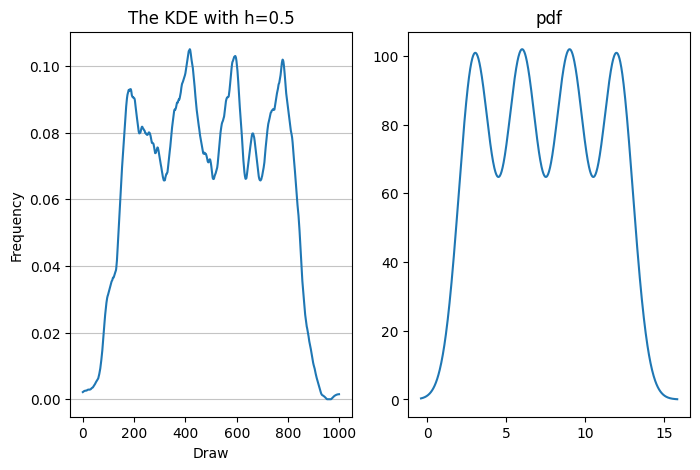

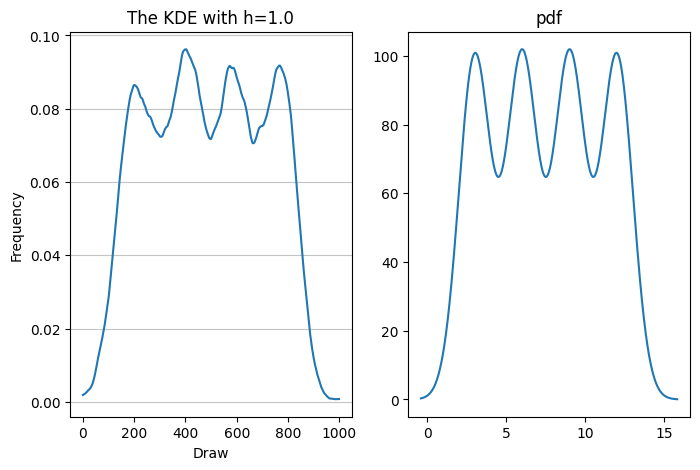

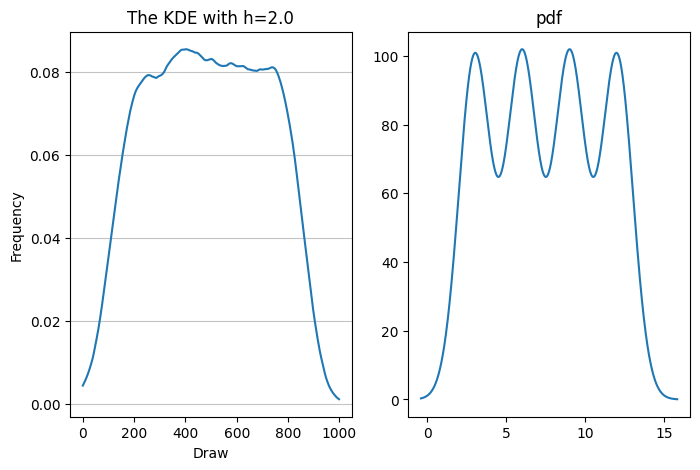

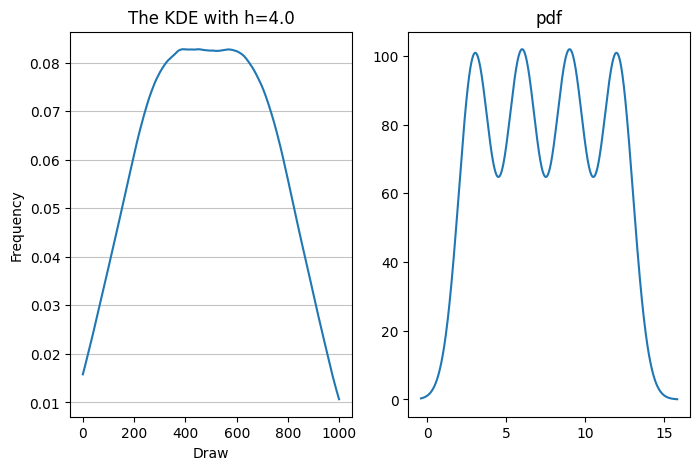

In [ ]:
hs = 2.**np.arange(-3, 3)

for h in hs:
    # KDE model with Epanechnikov kernel
    kde = KernelDensity(kernel='epanechnikov', bandwidth=h).fit(xs.reshape(-1, 1))
    # Generate a range of values for the plot
    x_vals = np.linspace(a, b, 1000)[:, np.newaxis]
    # Compute the log-density estimation and convert it back to density
    log_density = kde.score_samples(x_vals)
    density = np.exp(log_density)

    # Plotting the KDE and pdf
    plt.figure(figsize=(8, 5))  # Set the figure size
    plt.subplot(121)
    plt.plot(density)  # Adjust bins as necessary
    plt.title(f"The KDE with h={h}")
    plt.xlabel('Draw')
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)  # Add grid for better readability
    plt.subplot(122)
    plt.title("pdf")
    plt.plot(the_xs, f(the_xs) * 1000)
    plt.show()

**(ii):** Plot the KDE for $x$ with the Epanechnikov kernel with the bandwidth $h$ as given in (3.2).

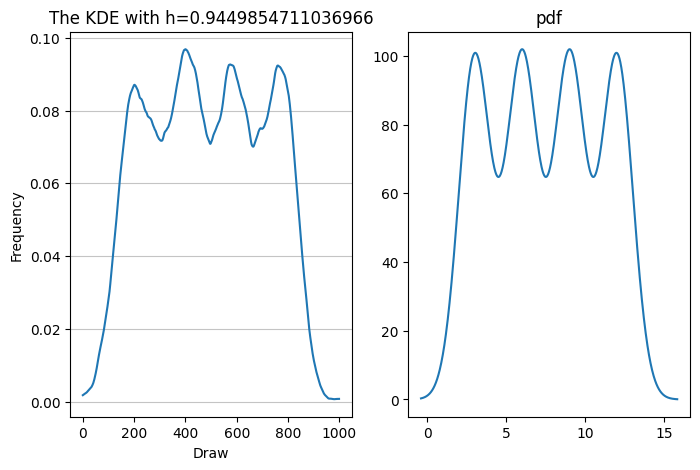

In [ ]:
sd = np.std(xs)
h = 1.059 * sd * (1000)**(-1/5)

# KDE model with Epanechnikov kernel
kde = KernelDensity(kernel='epanechnikov', bandwidth=h).fit(xs.reshape(-1, 1))
# Generate a range of values for the plot
x_vals = np.linspace(a, b, 1000)[:, np.newaxis]
# Compute the log-density estimation and convert it back to density
log_density = kde.score_samples(x_vals)
density = np.exp(log_density)

# Plotting the KDE and pdf
plt.figure(figsize=(8, 5))  # Set the figure size
plt.subplot(121)
plt.plot(density)  # Adjust bins as necessary
plt.title(f"The KDE with h={h}")
plt.xlabel('Draw')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)  # Add grid for better readability
plt.subplot(122)
plt.title("pdf")
plt.plot(the_xs, f(the_xs) * 1000)
plt.show()